# 概要
## データの読み込み、前処理
+ NIIのIRDB(https://irdb.nii.ac.jp/)の統計データを取得し、Pandas のDataFrameに読み込む

In [2]:
import pandas as pd
!python -V
print('Pandas',pd.__version__)

Python 3.10.7
Pandas 1.5.2


In [3]:
import pandas as pd
# df = pd.read_excel('2022irdb.xlsx', index_col=0)
df = pd.read_csv('2022.csv', index_col=0)
print(df.tail(5))

                  機関名              リポジトリ名   対象年  対象月  総件数  本文あり件数  DOI付与件数  \
タイトル                                                                         
2022年11月       横浜市立大学  横浜市立大学周年史デジタルアーカイブ  2022   11    0       0        0   
2022年10月     九州大谷短期大学     九州大谷短期大学機関リポジトリ  2022   10    0       0        0   
2022年11月     九州大谷短期大学     九州大谷短期大学機関リポジトリ  2022   11   23      23        0   
2022年10月  芸術文化観光専門職大学  芸術文化観光専門職大学機関リポジトリ  2022   10    0       0        0   
2022年11月  芸術文化観光専門職大学  芸術文化観光専門職大学機関リポジトリ  2022   11   20      20        0   

          embargoed access(全件数)  metadata only access(全件数)  \
タイトル                                                         
2022年11月                      0                          0   
2022年10月                      0                          0   
2022年11月                      0                          0   
2022年10月                      0                          0   
2022年11月                      0                          0   

          restrict

In [4]:
# 統計データから、ある月分を抽出
df2205 = df.loc['2022年11月']
df2205.tail(2)

,機関名,リポジトリ名,対象年,対象月,総件数,本文あり件数,DOI付与件数,embargoed access(全件数),metadata only access(全件数),restricted access(全件数),...,research proposal(本文あり),software(本文あり).1,technical documentation(本文あり),workflow(本文あり),data management plan(本文あり),interview(本文あり),manuscript(本文あり),newspaper(本文あり),software paper(本文あり),other(本文あり)
タイトル,,,,,,,,,,,,,,,,,,,,,
2022年11月,九州大谷短期大学,九州大谷短期大学機関リポジトリ,2022,11,23,23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022年11月,芸術文化観光専門職大学,芸術文化観光専門職大学機関リポジトリ,2022,11,20,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 機関名をインデクスにセット
df2205i = df2205.set_index('機関名')
print(df2205i)

                               リポジトリ名   対象年  対象月    総件数  本文あり件数  DOI付与件数  \
機関名                                                                        
横浜国立大学                横浜国立大学学術情報リポジトリ  2022   11  11838   11743     2058   
横浜商科大学                  横浜商科大学機関リポジトリ  2022   11   1546    1546        0   
横浜市立大学                横浜市立大学学術機関リポジトリ  2022   11   2132    2106      554   
安田女子大学                    安田女子大学リポジトリ  2022   11    538     538      537   
山梨県立大学                  山梨県立大学機関リポジトリ  2022   11   1378    1378        0   
...                               ...   ...  ...    ...     ...      ...   
大阪成蹊大学       大阪成蹊大学・大阪成蹊短期大学学術情報リポジトリ  2022   11     57      57        0   
長岡崇徳大学                  長岡崇徳大学機関リポジトリ  2022   11      4       4        0   
横浜市立大学             横浜市立大学周年史デジタルアーカイブ  2022   11      0       0        0   
九州大谷短期大学              九州大谷短期大学機関リポジトリ  2022   11     23      23        0   
芸術文化観光専門職大学        芸術文化観光専門職大学機関リポジトリ  2022   11     20      20        0   

           

In [6]:
# df2205iを全件数と、本文ありとに分け、差分（メタデータのみ）を取り出す。
# print(df2205i.iloc[:,17:64].columns)
# print(df2205i.iloc[:,75:].columns)
df2205_all = df2205i.iloc[:,17:64]
df2205_honbun = df2205i.iloc[:,75:]

df2205_all.set_axis(['conference paper', 'data paper',
       'departmental bulletin paper', 'editorial',
       'journal article', 'periodical', 'review article',
       'article', 'book', 'book part',
       'cartographic material', 'map', 'conference object',
       'conference proceedings', 'conference poster', 'dataset',
       'image', 'still image', 'moving image', 'video',
       'lecture', 'patent', 'internal report', 'report',
       'research report', 'technical report', 'policy report',
       'report part', 'working paper', 'sound', 'thesis',
       'bachelor thesis', 'master thesis', 'doctoral thesis',
       'interactive resource', 'learning object',
       'musical notation', 'research proposal', 'software',
       'technical documentation', 'workflow',
       'data management plan', 'interview', 'manuscript',
       'newspaper', 'software paper', 'other'], axis=1, inplace=True)
       
df2205_honbun.set_axis(['conference paper', 'data paper',
       'departmental bulletin paper', 'editorial',
       'journal article', 'periodical', 'review article',
       'article', 'book', 'book part',
       'cartographic material', 'map', 'conference object',
       'conference proceedings', 'conference poster', 'dataset',
       'image', 'still image', 'moving image', 'video',
       'lecture', 'patent', 'internal report', 'report',
       'research report', 'technical report', 'policy report',
       'report part', 'working paper', 'sound', 'thesis',
       'bachelor thesis', 'master thesis', 'doctoral thesis',
       'interactive resource', 'learning object',
       'musical notation', 'research proposal', 'software',
       'technical documentation', 'workflow',
       'data management plan', 'interview', 'manuscript',
       'newspaper', 'software paper', 'other'], axis=1, inplace=True)
# df2205_all.tail(2)
# df2205_honbun.tail(2)
# 全体-本文の差分（メタデータのみ）
df2205_sabun = df2205_all - df2205_honbun
df2205_sabun.describe()        # sample(5)


C:\Users\libso23-user\AppData\Local\Temp\ipykernel_23396\3594452581.py:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df2205_all.set_axis(['conference paper', 'data paper',
C:\Users\libso23-user\AppData\Local\Temp\ipykernel_23396\3594452581.py:24: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df2205_honbun.set_axis(['conference paper', 'data paper',


,conference paper,data paper,departmental bulletin paper,editorial,journal article,periodical,review article,article,book,book part,...,research proposal,software,technical documentation,workflow,data management plan,interview,manuscript,newspaper,software paper,other
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,...,789.0,789.000000,789.0,789.0,789.0,789.0,789.0,789.0,789.0,789.000000
mean,191.049430,0.001267,218.579214,0.026616,280.377693,1.864385,0.002535,162.901141,20.967047,0.143219,...,0.0,0.012674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.727503
std,4787.523166,0.035601,913.065444,0.649523,5113.000004,37.016296,0.071202,3806.370426,457.060428,3.848794,...,0.0,0.356009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,695.363078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,134073.000000,1.000000,12308.000000,18.000000,142003.000000,752.000000,2.000000,106320.000000,12806.000000,108.000000,...,0.0,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12313.000000


# 47個の資源タイプを、大項目13個にまとめる

In [7]:
# 13項目に列をまとめる(全件)
df2205_all['Kiyou'] = df2205_all['departmental bulletin paper']

df2205_all['Article'] =  df2205_all['conference paper']
+df2205_all['data paper']
+df2205_all['editorial']
+df2205_all['journal article']
+df2205_all['newspaper']
+df2205_all['periodical']
+df2205_all['review article']
+df2205_all['software paper']
+df2205_all['article']

df2205_all['Book'] = df2205_all['book']
+df2205_all['book part']

df2205_all['Cartographic Material'] = df2205_all['cartographic material']
+df2205_all['map']

df2205_all['Conference object'] = df2205_all['conference object']
+df2205_all['conference proceedings']
+df2205_all['conference poster']

df2205_all['Dataset'] = df2205_all['dataset']
+df2205_all['interview']

df2205_all['Image'] = df2205_all['image']
+df2205_all['still image']
+df2205_all['moving image']
+df2205_all['video']

df2205_all['Lecture'] = df2205_all['lecture']
df2205_all['Patent'] = df2205_all['patent']

df2205_all['Report'] = df2205_all['internal report']
+df2205_all['report']
+df2205_all['research report']
+df2205_all['technical report']
+df2205_all['policy report']
+df2205_all['report part']
+df2205_all['working paper']
+df2205_all['data management plan']

df2205_all['Sound'] = df2205_all['sound']

df2205_all['Thesis'] = df2205_all['thesis']
+df2205_all['bachelor thesis']
+df2205_all['master thesis']
+df2205_all['doctoral thesis']

df2205_all['Multiple'] = df2205_all['interactive resource']
+df2205_all['learning object']
+df2205_all['manuscript']
+df2205_all['musical notation']
+df2205_all['research proposal']
+df2205_all['software']
+df2205_all['technical documentation']
+df2205_all['workflow']
+df2205_all['other']

機関名
横浜国立大学         1143
横浜商科大学          722
横浜市立大学          211
安田女子大学            0
山梨県立大学            4
               ... 
大阪成蹊大学            0
長岡崇徳大学            0
横浜市立大学            0
九州大谷短期大学          1
芸術文化観光専門職大学       0
Name: other, Length: 789, dtype: int64

In [8]:
# 13項目に列をまとめる（本文あり）
df2205_honbun['Kiyou'] = df2205_honbun['departmental bulletin paper']

df2205_honbun['Article'] = df2205_honbun['conference paper']
+df2205_honbun['data paper']
+df2205_honbun['editorial']
+df2205_honbun['journal article']
+df2205_honbun['newspaper']
+df2205_honbun['periodical']
+df2205_honbun['review article']
+df2205_honbun['software paper']
+df2205_honbun['article']

df2205_honbun['Book'] = df2205_honbun['book']
+df2205_honbun['book part']

df2205_honbun['Cartographic Material'] = df2205_honbun['cartographic material']
+df2205_honbun['map']

df2205_honbun['Conference object'] = df2205_honbun['conference object']
+df2205_honbun['conference proceedings']
+df2205_honbun['conference poster']

df2205_honbun['Dataset'] = df2205_honbun['dataset']
+df2205_honbun['interview']

df2205_honbun['Image'] = df2205_honbun['image']
+df2205_honbun['still image']
+df2205_honbun['moving image']
+df2205_honbun['video']

df2205_honbun['Lecture'] = df2205_honbun['lecture']
df2205_honbun['Patent'] = df2205_honbun['patent']

df2205_honbun['Report'] = df2205_honbun['internal report']
+df2205_honbun['report']
+df2205_honbun['research report']
+df2205_honbun['technical report']
+df2205_honbun['policy report']
+df2205_honbun['report part']
+df2205_honbun['working paper']
+df2205_honbun['data management plan']

df2205_honbun['Sound'] = df2205_honbun['sound']

df2205_honbun['Thesis'] = df2205_honbun['thesis']
+df2205_honbun['bachelor thesis']
+df2205_honbun['master thesis']
+df2205_honbun['doctoral thesis']

df2205_honbun['Multiple'] = df2205_honbun['interactive resource']
+df2205_honbun['learning object']
+df2205_honbun['manuscript']
+df2205_honbun['musical notation']
+df2205_honbun['research proposal']
+df2205_honbun['software']
+df2205_honbun['technical documentation']
+df2205_honbun['workflow']
+df2205_honbun['other']


機関名
横浜国立大学         1143
横浜商科大学          722
横浜市立大学          211
安田女子大学            0
山梨県立大学            4
               ... 
大阪成蹊大学            0
長岡崇徳大学            0
横浜市立大学            0
九州大谷短期大学          1
芸術文化観光専門職大学       0
Name: other, Length: 789, dtype: int64

In [9]:
# 13項目に列をまとめる（差分：全件ー本文あり＝メタのみ）
df2205_sabun['Kiyou'] = df2205_sabun['departmental bulletin paper']

df2205_sabun['Article'] =  df2205_sabun['conference paper']
+df2205_sabun['data paper']
+df2205_sabun['editorial']
+df2205_sabun['journal article']
+df2205_sabun['newspaper']
+df2205_sabun['periodical']
+df2205_sabun['review article']
+df2205_sabun['software paper']
+df2205_sabun['article']

df2205_sabun['Book'] = df2205_sabun['book']
+df2205_sabun['book part']

df2205_sabun['Cartographic Material'] = df2205_sabun['cartographic material']
+df2205_sabun['map']

df2205_sabun['Conference object'] = df2205_sabun['conference object']
+df2205_sabun['conference proceedings']
+df2205_sabun['conference poster']

df2205_sabun['Dataset'] = df2205_sabun['dataset']
+df2205_sabun['interview']

df2205_sabun['Image'] = df2205_sabun['image']
+df2205_sabun['still image']
+df2205_sabun['moving image']
+df2205_sabun['video']

df2205_sabun['Lecture'] = df2205_sabun['lecture']
df2205_sabun['Patent'] = df2205_sabun['patent']

df2205_sabun['Report'] = df2205_sabun['internal report']
+df2205_sabun['report']
+df2205_sabun['research report']
+df2205_sabun['technical report']
+df2205_sabun['policy report']
+df2205_sabun['report part']
+df2205_sabun['working paper']
+df2205_sabun['data management plan']

df2205_sabun['Sound'] = df2205_sabun['sound']

df2205_sabun['Thesis'] = df2205_sabun['thesis']
+df2205_sabun['bachelor thesis']
+df2205_sabun['master thesis']
+df2205_sabun['doctoral thesis']

df2205_sabun['Multiple'] = df2205_sabun['interactive resource']
+df2205_sabun['learning object']
+df2205_sabun['manuscript']
+df2205_sabun['musical notation']
+df2205_sabun['research proposal']
+df2205_sabun['software']
+df2205_sabun['technical documentation']
+df2205_sabun['workflow']
+df2205_sabun['other']

機関名
横浜国立大学         0
横浜商科大学         0
横浜市立大学         0
安田女子大学         0
山梨県立大学         0
              ..
大阪成蹊大学         0
長岡崇徳大学         0
横浜市立大学         0
九州大谷短期大学       0
芸術文化観光専門職大学    0
Name: other, Length: 789, dtype: int64

In [10]:
# 13項目にまとめる（まとめた後不要項目をdrop）
df2205_all_d = df2205_all.drop(['departmental bulletin paper', 'conference paper', 'data paper', 'editorial', 'journal article', 'newspaper', 'periodical', 'review article', 'software paper', 'article', 'book', 'book part', 'cartographic material', 'map', 'conference object', 'conference proceedings', 'conference poster', 'dataset', 'interview', 'image', 'still image', 'moving image', 'video',
                                'lecture', 'patent', 'internal report', 'report', 'research report', 'technical report', 'policy report', 'report part', 'working paper', 'data management plan', 'sound', 'thesis', 'bachelor thesis', 'master thesis', 'doctoral thesis', 'interactive resource', 'learning object', 'manuscript', 'musical notation', 'research proposal', 'software', 'technical documentation', 'workflow', 'other'], axis=1)
df2205_honbun_d = df2205_honbun.drop(['departmental bulletin paper', 'conference paper', 'data paper', 'editorial', 'journal article', 'newspaper', 'periodical', 'review article', 'software paper', 'article', 'book', 'book part', 'cartographic material', 'map', 'conference object', 'conference proceedings', 'conference poster', 'dataset', 'interview', 'image', 'still image', 'moving image', 'video', 'lecture', 'patent', 'internal report', 'report', 'research report', 'technical report', 'policy report', 'report part', 'working paper', 'data management plan', 'sound', 'thesis', 'bachelor thesis', 'master thesis', 'doctoral thesis', 'interactive resource', 'learning object', 'manuscript', 'musical notation', 'research proposal', 'software', 'technical documentation', 'workflow', 'other'], axis=1)
df2205_sabun_d = df2205_sabun.drop(['departmental bulletin paper', 'conference paper', 'data paper', 'editorial', 'journal article', 'newspaper', 'periodical', 'review article', 'software paper', 'article', 'book', 'book part', 'cartographic material', 'map', 'conference object', 'conference proceedings', 'conference poster', 'dataset', 'interview', 'image', 'still image', 'moving image', 'video',
                                    'lecture', 'patent', 'internal report', 'report', 'research report', 'technical report', 'policy report', 'report part', 'working paper', 'data management plan', 'sound', 'thesis', 'bachelor thesis', 'master thesis', 'doctoral thesis', 'interactive resource', 'learning object', 'manuscript', 'musical notation', 'research proposal', 'software', 'technical documentation', 'workflow', 'other'], axis=1)
print(df2205_sabun_d)
print(df2205_honbun_d)
# print(df2205_all_d)


             Kiyou  Article  Book  Cartographic Material  Conference object  \
機関名                                                                           
横浜国立大学           4        0     2                      0                  0   
横浜商科大学           0        0     0                      0                  0   
横浜市立大学           1        0     0                      0                  0   
安田女子大学           0        0     0                      0                  0   
山梨県立大学           0        0     0                      0                  0   
...            ...      ...   ...                    ...                ...   
大阪成蹊大学           0        0     0                      0                  0   
長岡崇徳大学           0        0     0                      0                  0   
横浜市立大学           0        0     0                      0                  0   
九州大谷短期大学         0        0     0                      0                  0   
芸術文化観光専門職大学      0        0     0                   

# 主成分分析をしてみる
https://corvus-window.com/python_pca/
https://qiita.com/maskot1977/items/082557fcda78c4cdb41f
主成分分析（principal component analysis）とは相関のある多数の変数から相関のない少数で全体のばらつきを最もよく表す主成分と呼ばれる変数を合成する多変量解析の一手法[1]。データの次元を削減するために用いられる。
この時点で、13次元のデータですので、その散布図を可視化することは不可能です。そこで、主成分分析を用いて情報をなるべく失うことなく2次元へと次元圧縮をし、データの可視化をおこなってみる

In [11]:
df2205_all_d.describe()

,Kiyou,Article,Book,Cartographic Material,Conference object,Dataset,Image,Lecture,Patent,Report,Sound,Thesis,Multiple
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.0,789.0,789.000000,789.000000,789.0
mean,1993.239544,249.602028,78.128010,0.013942,93.576679,112.820025,6.076046,0.372624,0.0,0.0,0.008872,218.742712,0.0
std,5919.979304,5044.485846,644.070755,0.357740,1152.428752,1949.766679,170.599642,10.431092,0.0,0.0,0.249207,1200.556001,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
25%,129.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
50%,487.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
75%,1506.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,20.000000,0.0
max,122935.000000,140481.000000,12883.000000,10.000000,25743.000000,48965.000000,4792.000000,293.000000,0.0,0.0,7.000000,17369.000000,0.0


標準偏差が小さい(全体のバラツキが小さいということ、つまり、測定値の分布が平均値の周り に集まっているということ)列を削除

<AxesSubplot: >

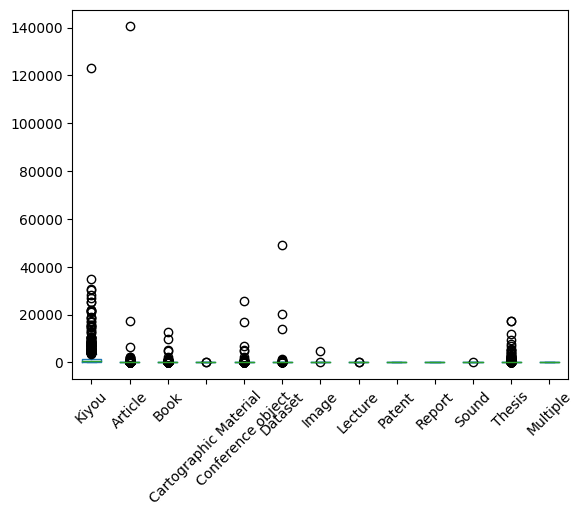

In [12]:
df2205_all_d.plot.box(rot=45)

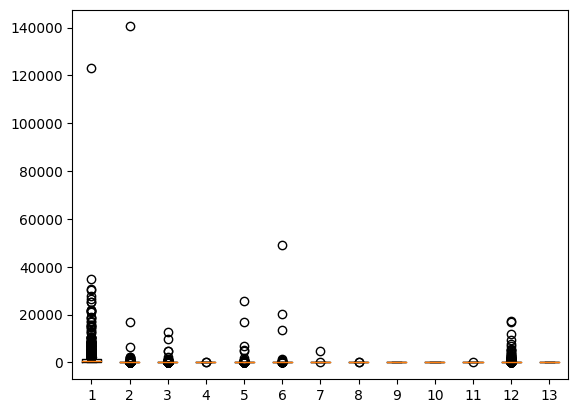

In [13]:
import matplotlib.pyplot as plt
# x = df2205_all_d.astype(float).to_numpy()
x = df2205_all_d
plt.boxplot(x, whis=0.5)  #whis=(0,100)だと全範囲
plt.savefig("result3.png")

In [14]:
# 主成分分析の前処理
# df2205_all.head(3)
# print(df2205_all.dropna(how='all', axis=1))
# 分散 var() 標準偏差 std()
# print(df2205_all.var())
# 分散がゼロの列を抽出
# print(df2205_all_d.var(axis=0) > 0.5)
# 標準偏差が1以下の列を抽出
print(df2205_all_d.std(axis=0) > 1)

Kiyou                     True
Article                   True
Book                      True
Cartographic Material    False
Conference object         True
Dataset                   True
Image                     True
Lecture                   True
Patent                   False
Report                   False
Sound                    False
Thesis                    True
Multiple                 False
dtype: bool


In [15]:
# 分散varが 0 の列を削除
# 3列削除されて、10列（10項目）になる
# 標準偏差 std が1以下の列を削除
# var0 = (df2205_all_d.var(axis=0) > 0)  # []リストではだめだった,== だと分散0の列が抽出される 
std0 = (df2205_all_d.std(axis=0) > 1)  # []リストではだめだった,== だと分散0の列が抽出される 
# df2205_all_d.index[df2205_all_d.var(axis=0) < 0]
df2205_all_dstd = df2205_all_d.loc[:, std0]
df2205_all_dstd


,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
機関名,,,,,,,,
横浜国立大学,7240,118,454,13,0,0,0,443
横浜商科大学,809,0,0,0,0,0,0,0
横浜市立大学,1006,0,0,0,0,0,0,750
安田女子大学,532,0,0,0,0,0,0,0
山梨県立大学,1104,0,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...
大阪成蹊大学,57,0,0,0,0,0,0,0
長岡崇徳大学,4,0,0,0,0,0,0,0
横浜市立大学,0,0,0,0,0,0,0,0


In [16]:
df2205_all_dstd.describe()

,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,1993.239544,249.602028,78.128010,93.576679,112.820025,6.076046,0.372624,218.742712
std,5919.979304,5044.485846,644.070755,1152.428752,1949.766679,170.599642,10.431092,1200.556001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,487.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1506.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,20.000000
max,122935.000000,140481.000000,12883.000000,25743.000000,48965.000000,4792.000000,293.000000,17369.000000


<AxesSubplot: >

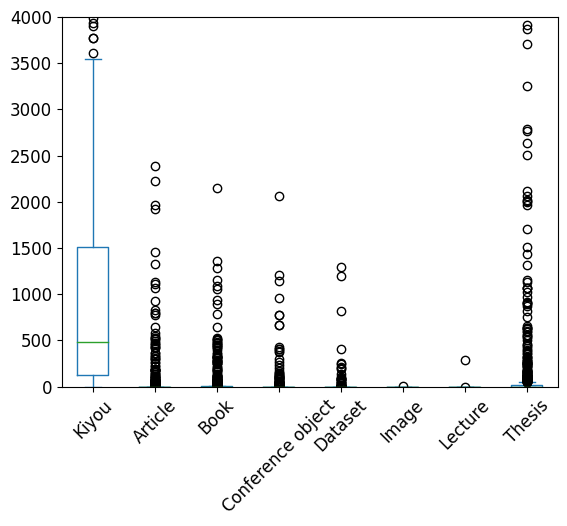

In [44]:
# df2205_all_dstd.plot.box(rot=45)
# Y軸を区切って表示する
df2205_all_dstd.plot.box(rot=45, ylim=[0,4000])

In [18]:
df2205_all_dstd[df2205_all_dstd['Kiyou']>40000]

,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
機関名,,,,,,,,
京都大学,122935,1460,940,1147,254,0,0,0


In [19]:
df2205_all_dstd[df2205_all_dstd['Article']>40000]

,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
機関名,,,,,,,,
東京工業大学,828,140481,12883,0,11,0,0,7572


In [20]:
df2205_all_dstd[df2205_all_dstd['Dataset']>40000]

,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
機関名,,,,,,,,
千葉大学,10557,91,134,2065,48965,0,0,1970


<AxesSubplot: >

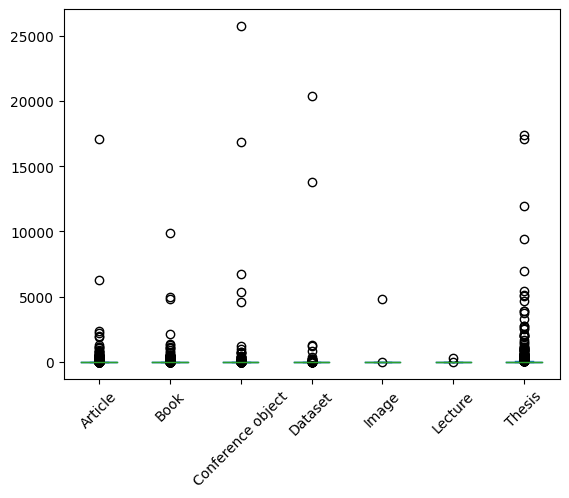

In [21]:
# 外れ値を指定して削除
# print(df2205_all_dstd.drop(['京都大学', '東京工業大学', '千葉大学']))
# 789 rows × 8 columns->[786 rows x 8 columns]
# df2205_all_dstd.drop(['京都大学', '東京工業大学', '千葉大学']).plot.box(rot=45)
# df2205_all_dstd.iloc[:,1:] # 'Kiyou'を省く
df2205_all_dstd.iloc[:,1:].drop(['京都大学', '東京工業大学', '千葉大学']).plot.box(rot=45)


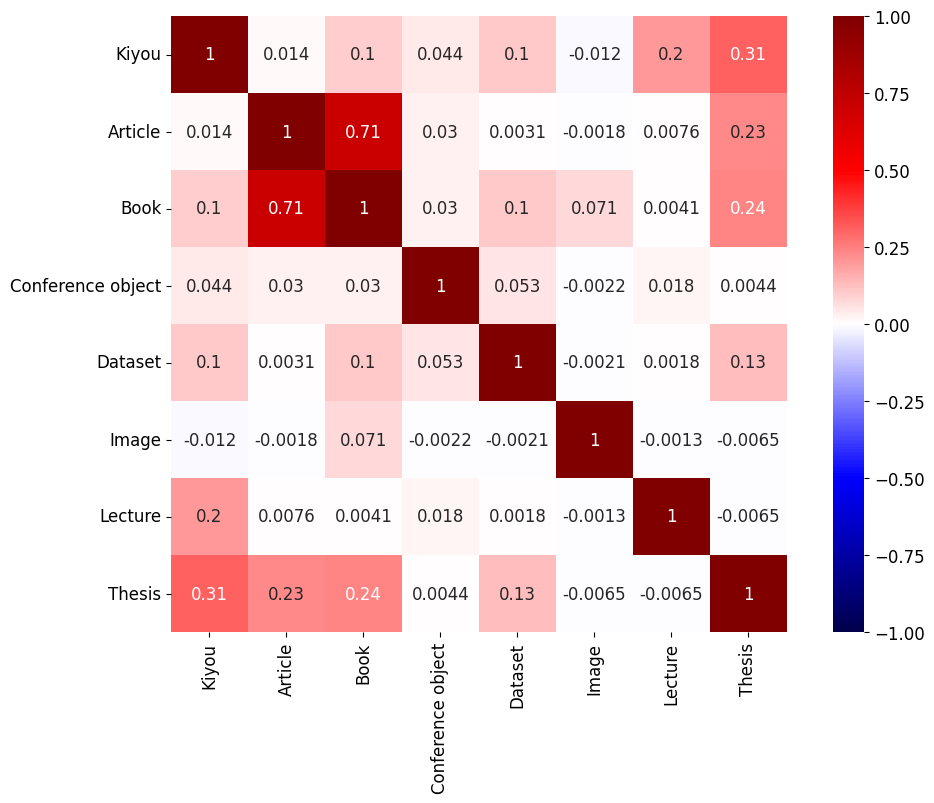

In [22]:
# 特徴量の確認（相関行列、散布図）
# 相関行列や散布図を用いて特徴量の分布などを確認していきます。
# ライブラリのインポート
import matplotlib.pyplot as plt
import seaborn as sns

# 相関行列
correlation_coefficients = df2205_all_dstd.corr()  # 相関行列の計算
# 相関行列のヒートマップ (相関係数の値あり) 
plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 8))  # この段階で画像のサイズを指定する
sns.heatmap(correlation_coefficients, vmax=1, vmin=-1, cmap='seismic', square=True, annot=True, xticklabels=1, yticklabels=1)
plt.xlim([0, correlation_coefficients.shape[0]])
plt.show()

In [ ]:
# 行・列ごとに欠損値の個数をカウント
# print(df2205_all.isnull().sum(axis=0))
df2205_all_dstd.dropna(how='all', axis=0, inplace=True)

In [26]:
# 変数の標準化
df2205_all_std = df2205_all_dstd.apply(lambda x: (x-x.mean())/x.std(), axis=0)
# df2205_all_std.sample(3)
# df2205_all_std.describe().astype(int)
df2205_all_std.describe().round(2)

,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
count,789.00,789.00,789.00,789.00,789.00,789.00,789.00,789.00
mean,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.34,-0.05,-0.12,-0.08,-0.06,-0.04,-0.04,-0.18
25%,-0.31,-0.05,-0.12,-0.08,-0.06,-0.04,-0.04,-0.18
50%,-0.25,-0.05,-0.12,-0.08,-0.06,-0.04,-0.04,-0.18
75%,-0.08,-0.05,-0.12,-0.08,-0.06,-0.04,-0.04,-0.17
max,20.43,27.80,19.88,22.26,25.06,28.05,28.05,14.29


<AxesSubplot: >

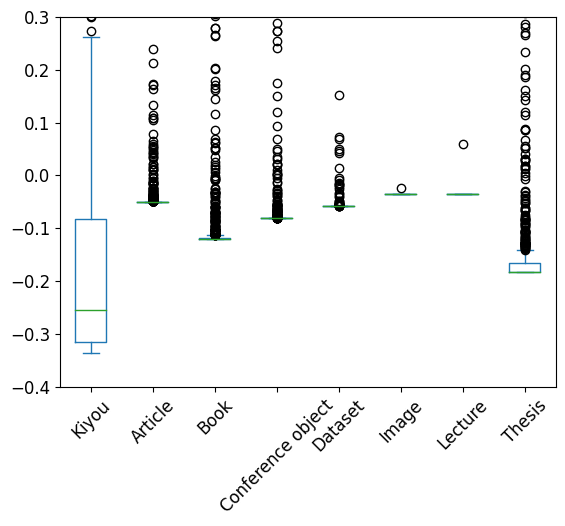

In [40]:
# df2205_all_std[df2205_all_std<0.1].plot.box(rot=45)
df2205_all_std.plot.box(rot=45,ylim=[-0.4,0.3])

<class 'seaborn.axisgrid.PairGrid'>


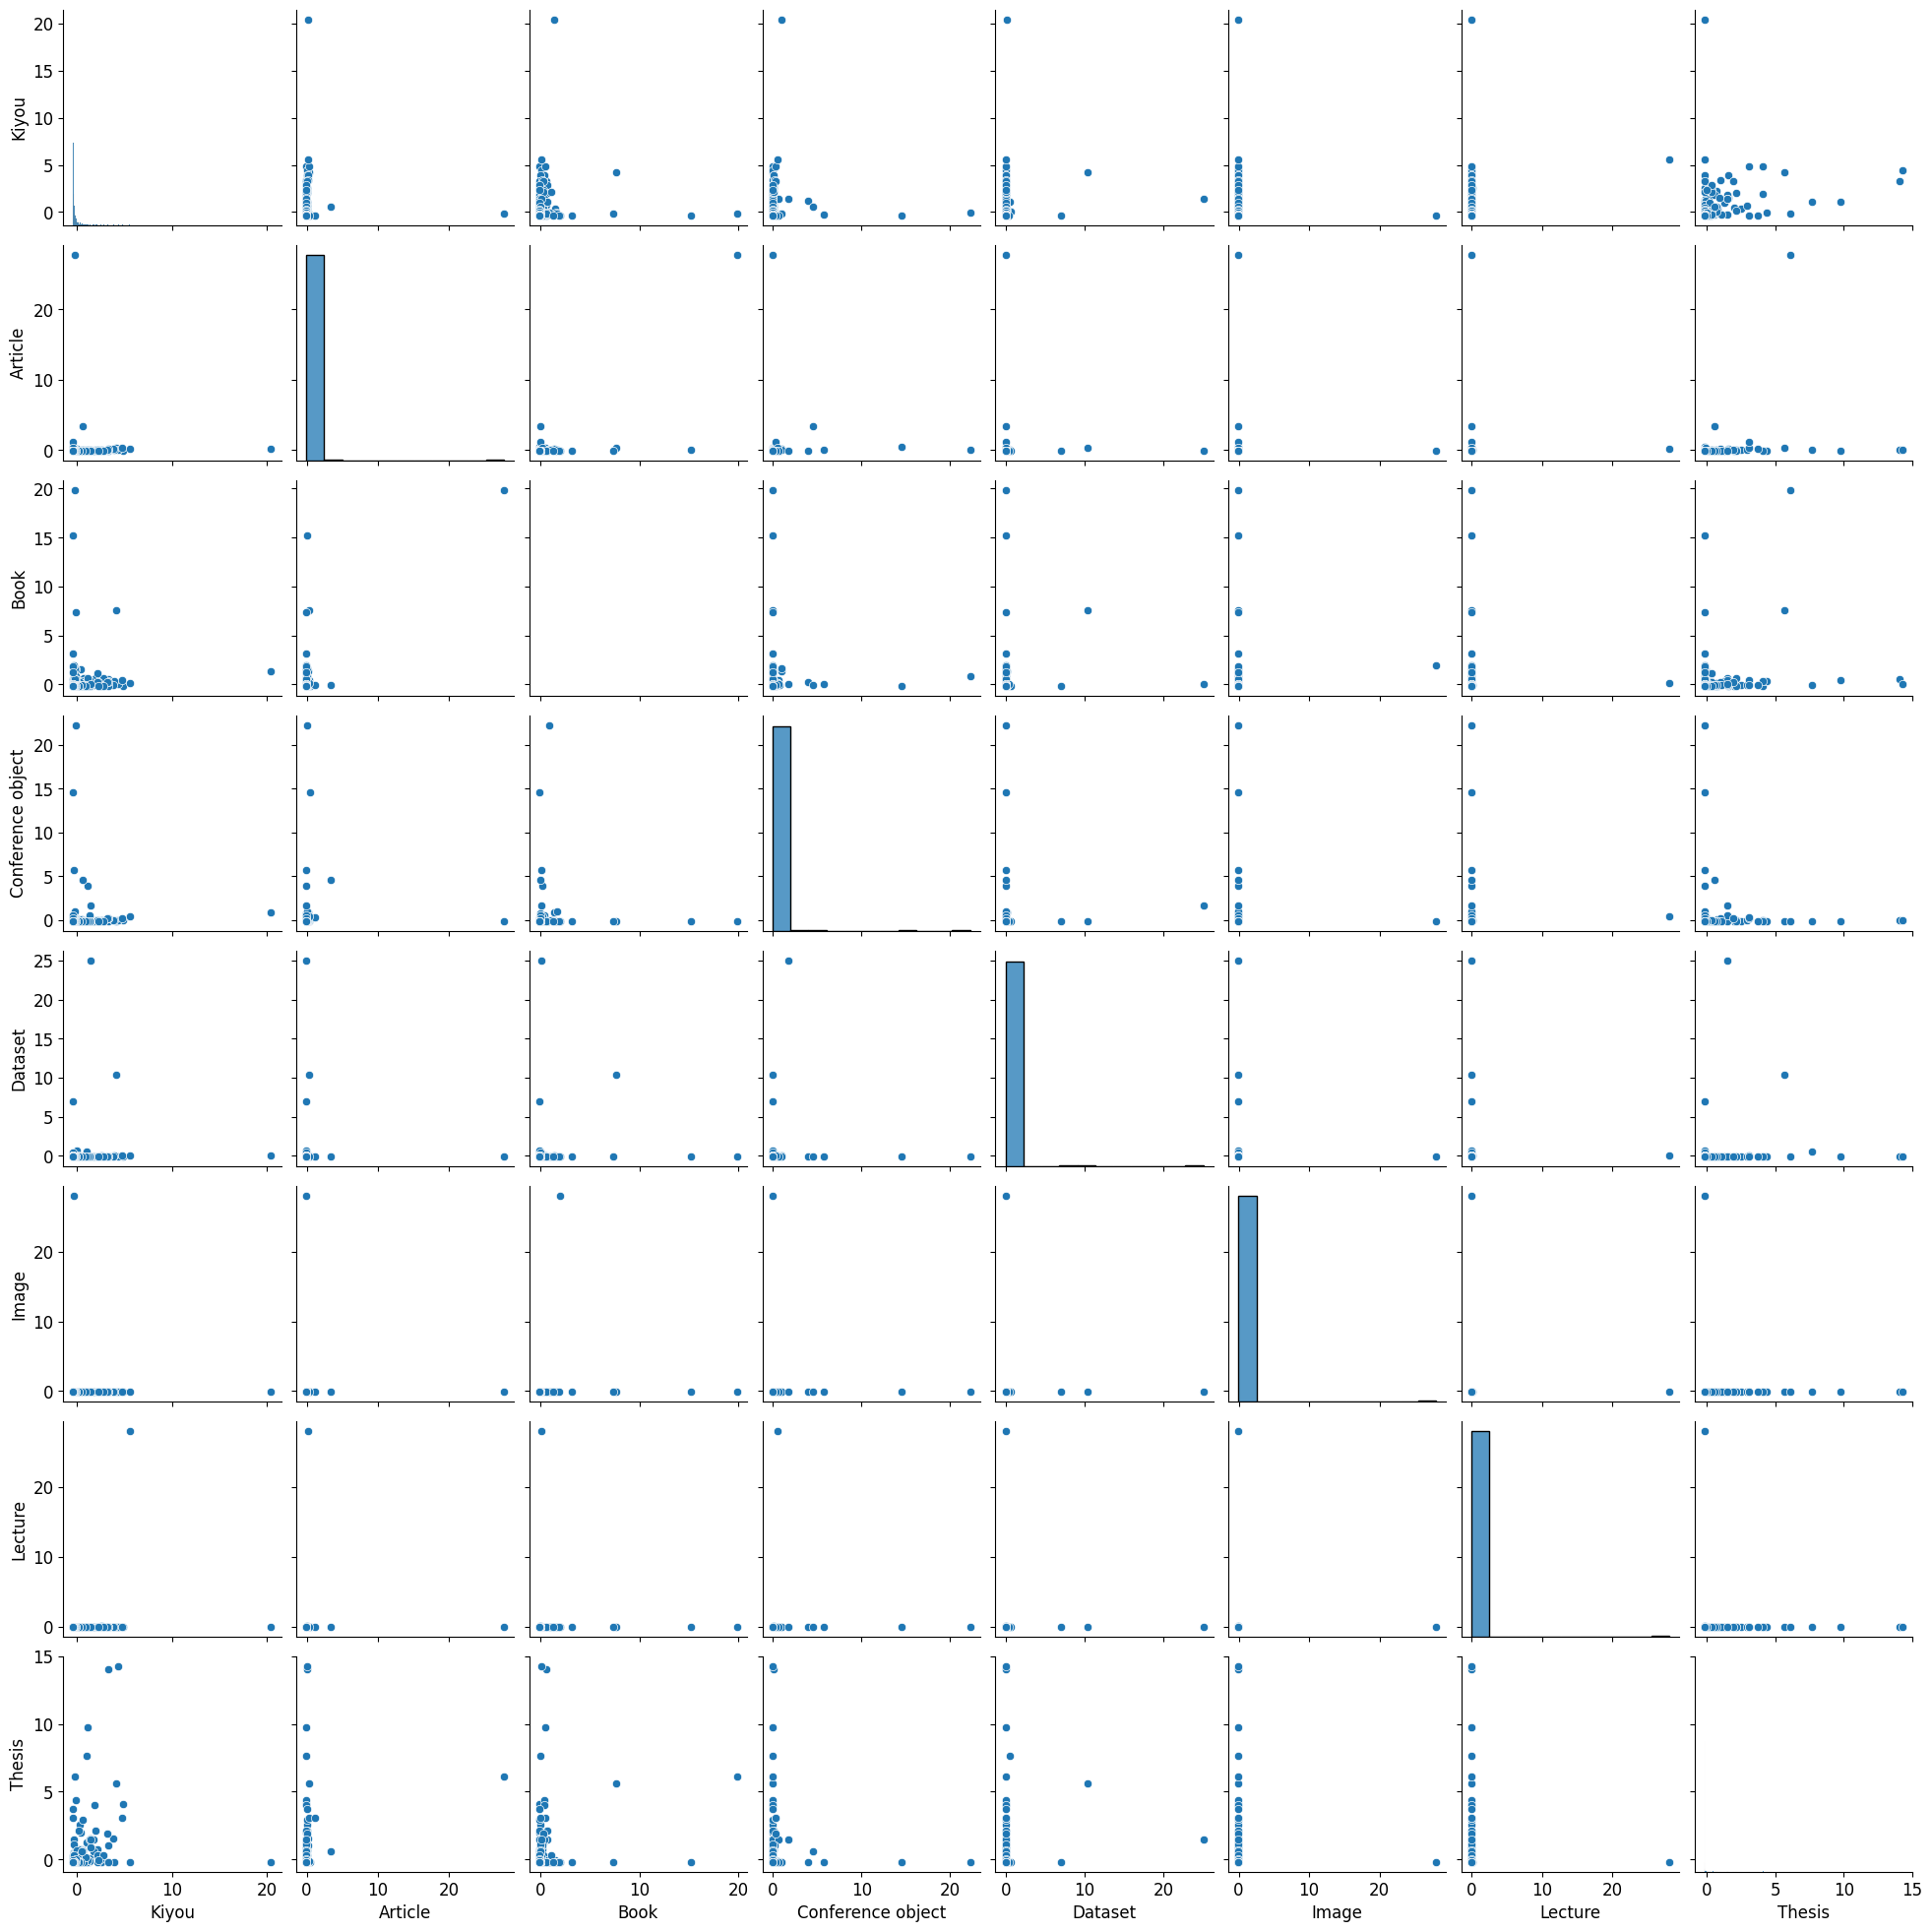

In [45]:
import seaborn as sns
pg = sns.pairplot(df2205_all_std)
print(type(pg))

In [46]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  
# 主成分分析の実行
pca = PCA()
pca.fit(df2205_all_std)

# データを主成分に変換
pca_row = pca.transform(df2205_all_std)
pca_row


array([[ 0.62815796,  0.44536063,  0.15439966, ..., -0.26254152,
         0.57874812,  0.34868365],
       [-0.2485276 , -0.17438516,  0.02745626, ...,  0.08164069,
        -0.01640722, -0.03319745],
       [ 0.0210624 ,  0.04119222, -0.05151351, ..., -0.1823244 ,
        -0.40276833, -0.00389709],
       ...,
       [-0.28295311, -0.26251542,  0.01042481, ...,  0.11740927,
        -0.10465198, -0.01900601],
       [-0.28201694, -0.2601188 ,  0.01088797, ...,  0.11643658,
        -0.10225225, -0.01939193],
       [-0.28210204, -0.26033667,  0.01084586, ...,  0.116525  ,
        -0.10247041, -0.01935685]])

In [48]:
# 主成分得点
pd.DataFrame(pca_row, columns=["PC{}".format(x + 1)
              for x in range(len(df2205_all_std.columns))]).describe().round(2)
#              #.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
count,789.00,789.00,789.00,789.00,789.00,789.00,789.00,789.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.38,1.14,1.01,1.00,1.00,0.94,0.78,0.52
min,-0.28,-13.22,-16.18,-3.85,-13.17,-7.00,-6.92,-5.16
25%,-0.27,-0.25,0.01,-0.05,-0.03,0.03,-0.10,-0.04
50%,-0.25,-0.21,0.02,-0.04,-0.03,0.09,-0.06,-0.02
75%,-0.16,-0.08,0.04,-0.03,-0.01,0.11,0.04,-0.02
max,31.12,15.59,17.66,19.97,18.53,15.23,13.53,10.63


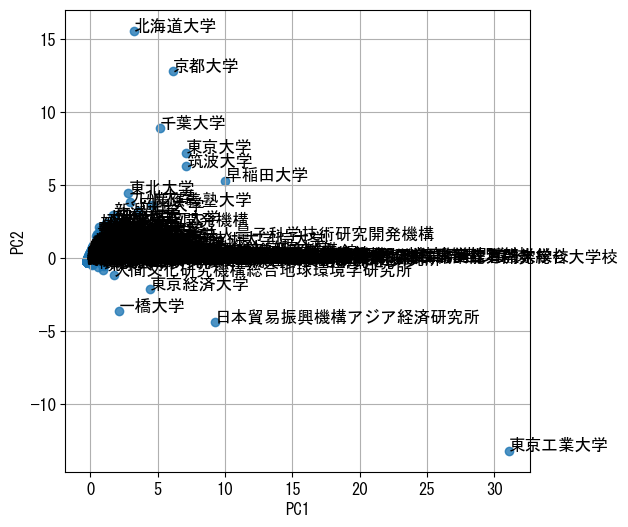

In [49]:
# 第一主成分と第二主成分でプロットする
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
plt.figure(figsize=(6, 6))
# ラベルにインデクス（機関名）を追加する
for x, y, name in zip(pca_row[:, 0], pca_row[:, 1], list(df2205_all_std.index)):
    plt.text(x, y, name)
plt.scatter(pca_row[:, 0], pca_row[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [ ]:
# 外れ値（例外的に、値が大きな機関）を削除する
# ndのままでやると、DataFrameと食い違ってしまってプロットしたときラベルがおかしくなる
# pca_row2 = np.delete(pca_row, np.where(pca_row > 15)[0], axis=0)
# pca_row2.shape
# nd配列pca_rowをDataFrameにする
pca_row_df = pd.DataFrame(pca_row, index= list(df2205_all_std.index), columns=["PC{}".format(x + 1)
              for x in range(len(df2205_all_std.columns))])
outlier = list(pca_row_df[pca_row_df[['PC1','PC2']] > 10].dropna(how='all').index)
pca_row_df_o = pca_row_df.drop(outlier)
outlier

In [ ]:
# pandas.DataFrameをNumPy配列ndarrayに変換
pca_row_o = pca_row_df_o.to_numpy()
pca_row_o

In [ ]:
# 外れ値を除外した後で、
# 第一主成分と第二主成分でプロットする
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
plt.figure(figsize=(6, 6))
# ラベルにインデクス（機関名）を追加する
for x, y, name in zip(pca_row_o[:, 0], pca_row_o[:, 1], list(pca_row_df_o.index)):
    plt.text(x, y, name)
plt.scatter(pca_row_o[:, 0], pca_row_o[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [ ]:
# 寄与率を求める
# pca_col = ["PC{}".format(x + 1) for x in range(len(df2205_all_std.columns))]
pca_col = ["PC{}".format(x + 1) for x in range(len(pca_row_df_o.columns))]
df_con_ratio = pd.DataFrame([pca.explained_variance_ratio_], columns = pca_col)
print(df_con_ratio.head())

# 累積寄与率を図示する
cum_con_ratio = np.hstack([0, pca.explained_variance_ratio_]).cumsum()
plt.plot(cum_con_ratio, 'D-')
plt.xticks(range(13))
plt.yticks(np.arange(0,1.05,0.05))
plt.grid()
plt.show()

第1主成分の寄与率は，0.299547 であることが分かります．また，累積寄与率は表現したグラフから第9主成分までで約80％の情報を説明できているということが分かります．

一般的には，累積寄与率が80％以上になる主成分数を採用して分析結果に用いることが多いです80％以上を目安に主成分を選択します．

② 主成分負荷量を求める

主成分負荷量とは，各主成分に対する各変数の影響度合いになります．-1から1の間の値を取り，絶対値が大きいほど影響度が大きくなります．主成分負荷量を求めることで，各主成分が何を意味しているかが分かりやすくなります

In [ ]:
pca_row_o

In [ ]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
# 第一主成分と第二主成分における観測変数の寄与度をプロットすることにより、各成分が何を考慮した値なのかのヒントが得られます。
plt.figure(figsize=(12, 12))
pca_list = []
# for x, y, name in zip(pca.components_[0], pca.components_[1], df2205_all_std.columns[1:]):
for x, y, name in zip(pca.components_[0], pca.components_[1], df2205_all_dstd.columns[1:]):
    plt.text(x, y, name)
    pca_list.append([x, y, name])
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [ ]:
pca_list

第1主成分に対して主成分負荷量が大きい項目は，Conference object と Bookであること、
第2主成分に対しては、'Article''Thesis'
がわかります．
kiyou は、全体的に量が多く、主成分には寄与していません。

In [ ]:
len(df2205_all_std.columns) # 36
# std_index = df2205_all_std.index.to_list()
std_index = pca_row_df_o.index.to_list()
# PCA の固有ベクトル
# pd.DataFrame(pca.components_, columns=df.columns[1:], index=["PC{}".format(x + 1) for x in range(len(df2205_all_std.columns))])
# 主成分得点
# pca_tokuten = pd.DataFrame(pca_row, columns=["PC{}".format(x + 1) for x in range(len(df2205_all_std.columns))])
pca_tokuten = pd.DataFrame(pca_row_o, columns=["PC{}".format(x + 1) for x in range(len(pca_row_df_o.columns))])
pca_tokuten['index'] = std_index
pca_tokuten.set_index('index', inplace=True)
pca_tokuten.head()
# pca_tokuten.describe()


In [ ]:
pca_row

In [ ]:
plt.rcParams["font.family"] = "Meiryo"
# 主成分得点を求める
fig, ax = plt.subplots()
pca_tokuten.plot(0,1,kind='scatter',ax=ax)

plt.figure(figsize=(12,12))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")

for k, v in pca_tokuten.iterrows():
             plt.annotate(k,xy=(v[0],v[1]),size=8)

In [ ]:
pca_tokuten.loc['岐阜大学',:]

In [ ]:
# 主成分負荷量を求める
df_pca = pd.DataFrame(pca_row, columns=pca_col)
df_pca_vec = pd.DataFrame(pca.components_, columns=df2205_all_std.columns,
                          index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))])
print(df_pca_vec)

print(pca.components_[0])
print(pca.components_)

# 主成分負荷量を図示する
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df2205_all.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# ValueError: Shape of passed values is (36, 36), indices imply (36, 47)
# TypeError: only size-1 arrays can be converted to Python scalars 
# plt.scatter(pca.components_[0], pca.components_)


# 構成比率

In [ ]:
# Total列を追加
df2205_all_d = pd.concat([df2205_all_d, pd.DataFrame(
    df2205_all_d.sum(axis=1), columns=['Total'])], axis=1)
df2205_honbun_d = pd.concat([df2205_honbun_d, pd.DataFrame(
    df2205_honbun_d.sum(axis=1), columns=['Total'])], axis=1)
df2205_sabun_d = pd.concat([df2205_sabun_d, pd.DataFrame(
    df2205_sabun_d.sum(axis=1), columns=['Total'])], axis=1)
df2205_all_d
# Totalの降順にソートする
df2205_all_d = df2205_all_d.sort_values(by='Total', ascending=False)
df2205_honbun_d = df2205_honbun_d.sort_values(by='Total', ascending=False)
df2205_sabun_d = df2205_sabun_d.sort_values(by='Total', ascending=False)
# df2205i_sabun_d

In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
df2205_all_d.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関（全件数）',)\
     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df2205_honbun_d.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関（本文あり）',)\
     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df2205_sabun_d.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関（メタデータのみ）',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
# 全てでグラフを描くと32.7s
# df2205i_all_d3.plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',).legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)



In [ ]:
# 行ごとの百分率に変換する
df2205i_all_d4 = df2205i_all_d3.div(
    df2205i_all_d3['Total'], axis=0).mul(100)  # .round(2) 四捨五入
# 判例の位置調整　https://qiita.com/matsui-k20xx/items/291400ed56a39ed63462
#df2205i_all_d4.iloc[:50, ].drop("Total", axis=1)\
#    .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
#    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df2205i_all_d4.drop("Total", axis=1)\
    .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
# Kiyouの降順にソートする
df2205i_all_d5 = df2205i_all_d4.sort_values(by='Kiyou', ascending=False)
df2205i_all_d5.drop("Total", axis=1)\
    .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='資料タイプ別百分率',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
# 特徴量スケーリング（正規化）
import numpy as np

df2205i_all_d3.head()

# Min-Max Normalization
df_norm = (df2205i_all_d3-df2205i_all_d3.min()) / \
    (df2205i_all_d3.max()-df2205i_all_d3.min())
    
print("Scaled Dataset Using Pandas")
df_norm.head()


In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
# df_norm.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
#     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df_norm.drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
print(df2205i_all_d3.columns.to_list())

In [ ]:
# 特徴量スケーリング（標準化）
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df2205i_honbun_d.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Kiyou', 'Article', 'Book', 'Cartographic Material', 'Conference object',
                         'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple', 'Total'])
df_scaled.head()


In [ ]:
import seaborn as sns
cor = df_scaled[['Kiyou', 'Article', 'Book', 'Cartographic Material', 'Conference object',
                         'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple']].corr()
cor.dropna(how="all", axis=0, inplace=True)
cor.dropna(how="all", axis=1, inplace=True)
p = sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)
p.set(title = "資源タイプごとの相関係数（本文あり）")
# ヒートマップを出力
#https://qiita.com/Tom-tom-tom/items/f0e7800fbe72fd729a8d



In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
# df_norm.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
#     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df_scaled.drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
# 転置
df2205T = df2205i_all_d3.T
# df2205T.loc['Total',]
df2205T = df2205T.drop('Total', axis=0)

In [ ]:
col_list = df2205T.columns.to_list()

In [ ]:
# 特徴量スケーリング（標準化）
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_scaled2 = std_scaler.fit_transform(df2205T.to_numpy())
df_scaled2 = pd.DataFrame(df_scaled2, columns=col_list)

print("Scaled Dataset Using StandardScaler")
df_scaled2  # .head()

In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
df_scaled2.T.plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
df2205_all_d.drop(['Total'], axis=1, inplace=True)
df2205_honbun_d.drop(['Total'], axis=1, inplace=True)
df2205_sabun_d.drop(['Total'], axis=1, inplace=True)

In [ ]:
df2205i_all_d3.head()


In [ ]:
df2205_2jiku = df2205_all_d.copy()
df2205_2jikuh = df2205_honbun_d.copy()
df2205_2jiku['igai'] = df2205_2jiku.loc[:, ['Article', 'Book', 'Cartographic Material', 'Conference object','Dataset',\
    'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple']].sum(axis=1).copy()
df2205_2jiku = df2205_2jiku.drop(['Article', 'Book', 'Cartographic Material', 'Conference object',
                                 'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple', 'Total'], axis=1)
df2205_2jikuh['igai'] = df2205_2jikuh.loc[:, ['Article', 'Book', 'Cartographic Material', 'Conference object', 'Dataset',
                                            'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple']].sum(axis=1).copy()
df2205_2jikuh = df2205_2jikuh.drop(['Article', 'Book', 'Cartographic Material', 'Conference object',
                                 'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple', 'Total'], axis=1)
# kiyou = df2205i_all_d3.loc[:,'Kiyou'].c
# print(df2205_2jiku['kiyou'])
df2205_2jikuh.head()


In [ ]:
df2205_2jiku.plot.scatter(x='Kiyou', y='igai', alpha=0.5)
df2205_2jikuh.plot.scatter(x='Kiyou', y='igai', alpha=0.5)

In [ ]:
# 各列の最大値のindexを表示
print(df2205_2jiku.idxmax())
print(df2205_2jikuh.idxmax())


In [ ]:
# 六角形ビニング図（hexbin plot）https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html
# 外れ値との差が多すぎると意味がない
df2205_2jiku.plot.hexbin(x='Kiyou', y='igai', gridsize=200, sharex=False)


In [ ]:
# 特徴量スケーリング（標準化）
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_scaled3 = std_scaler.fit_transform(df2205_2jiku.to_numpy())
df_scaled3 = pd.DataFrame(df_scaled3, columns=['Kiyou', 'igai'])

print("Scaled Dataset Using StandardScaler")
df_scaled3.head()


In [ ]:
df_scaled3.plot.scatter(x='Kiyou', y='igai', alpha=0.5)
